In [3]:
import tensorflow as tf



In [31]:
import tensorboard

In [4]:
tf.__version__

'2.6.0'

In [5]:
tf.keras.__version__

'2.6.0'

In [6]:
tf.config.list_logical_devices("GPU")

[]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full[0].shape

(28, 28)

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

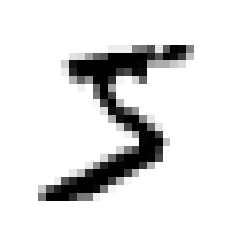

In [14]:
img=X_train_full[0]
plt.imshow(img, cmap='binary')
plt.axis('off')
plt.show()

In [15]:
y_train_full.shape

(60000,)

In [16]:
y_train_full[0]

5

In [17]:
img.max(),img.min()

(255, 0)

<AxesSubplot:>

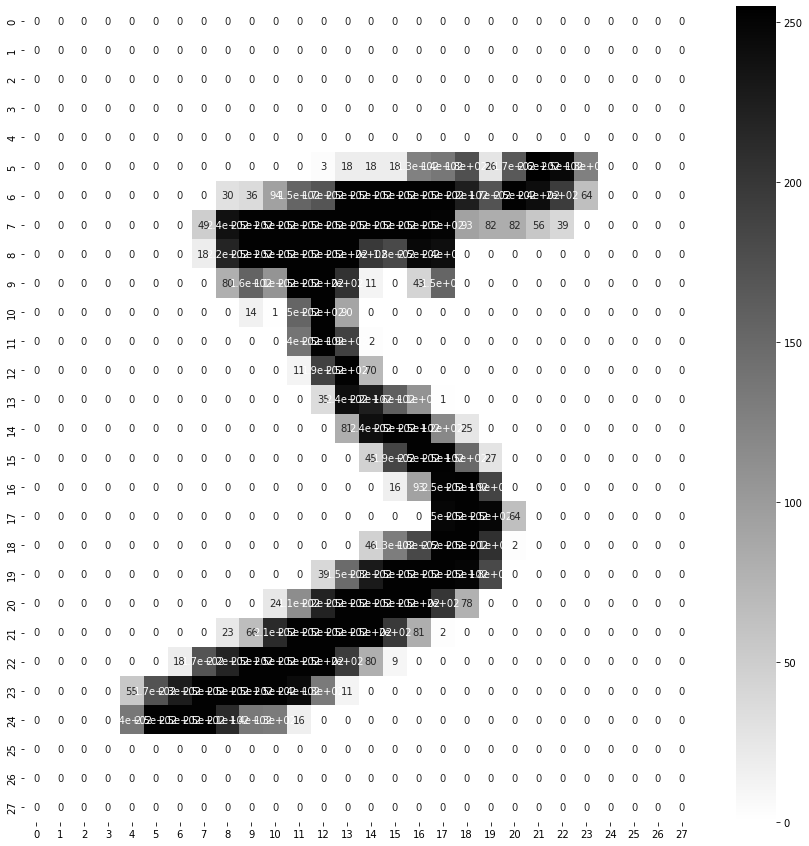

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(img, annot=True, cmap='binary')


<AxesSubplot:>

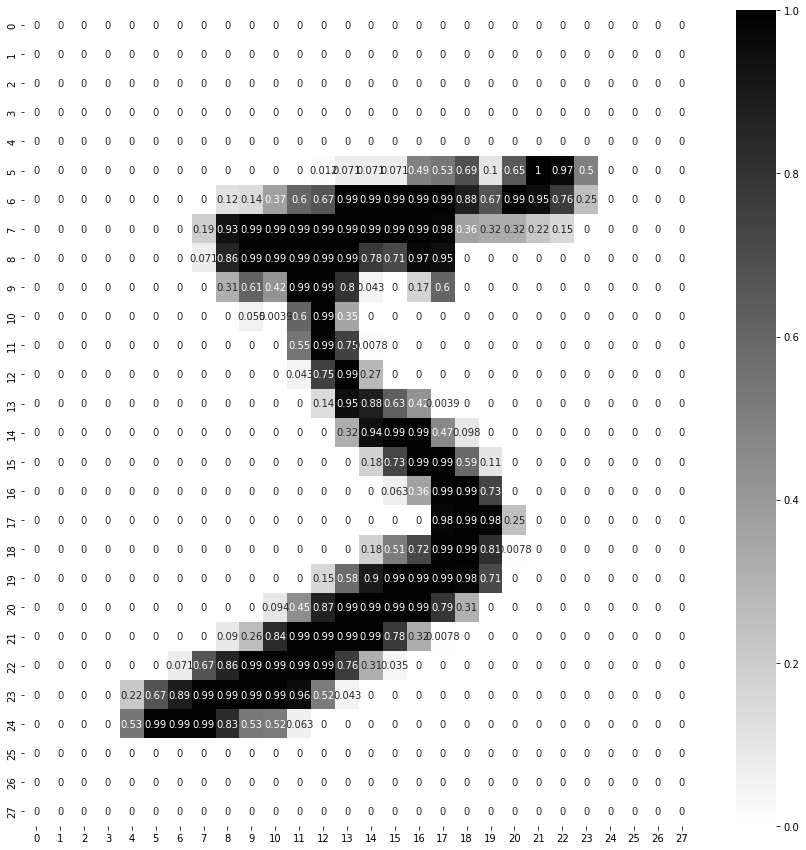

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255, annot=True, cmap='binary')

In [25]:
X_valid, X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train=y_train_full[:5000] , y_train_full[5000:]

In [34]:
# create tensorflow log directory with uniq name
import os
import time
def get_log_path(log_dir="logs\\fit"):
    unique_name =time.strftime("log_%Y_%m_%d_%H_%M%S")
    log_path=os.path.join(log_dir, unique_name)
    
    print(f"Savings log at :{log_path}")
    
    return log_path

log_dir= get_log_path()

Savings log at :logs\fit\log_2022_04_07_22_4359


In [35]:
file_writer=tf.summary.create_file_writer(logdir=log_dir)

In [36]:
with file_writer.as_default():
    images=np.reshape(X_train[10:30], (-1,28,28 , 1))
    tf.summary.image("20 handwritten digit samples", images, max_outputs=25 , step=0)

In [37]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [41]:
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
y_test.shape

(10000,)

In [44]:
X_valid, X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train=y_train_full[:5000] , y_train_full[5000:]

In [45]:
X_test=X_test_full/255.
y_test=y_test

In [51]:
LAYERS= [
    
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation='relu', name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation='softmax', name="outputLayer")
    
]

In [52]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [53]:
model_clf.layers

In [54]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
# first layer *second layer+bias
784*300+300,300*100+100,100*10+10


(235500, 30100, 1010)

In [66]:
np.sum((235500, 30100, 1010))

266610

In [71]:
model_clf.layers[0].name

'inputLayer'

In [72]:
model_clf.layers[1].name

'hiddenLayer1'

In [69]:
model_clf.layers[0].get_weights()

[]

In [73]:
model_clf.layers[1].get_weights()

[array([[ 0.03868408,  0.05819887, -0.04508677, ...,  0.01543309,
         -0.04780681,  0.01152193],
        [-0.06952389,  0.01698373,  0.05069911, ...,  0.0662251 ,
          0.01645647, -0.01727646],
        [ 0.04294331,  0.06778382,  0.0262856 , ...,  0.0254015 ,
          0.0192993 , -0.00318781],
        ...,
        [ 0.02857421, -0.0017494 , -0.03905687, ..., -0.04872984,
          0.02942939, -0.04059808],
        [ 0.03431989,  0.01167726, -0.03368259, ..., -0.01074797,
         -0.05569849,  0.06692994],
        [ 0.03926095,  0.04078349, -0.01845429, ...,  0.01414125,
          0.00925113, -0.05184354]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [74]:
weights,biases=model_clf.layers[1].get_weights()

In [75]:
weights.shape

(784, 300)

In [76]:
biases.shape

(300,)

In [77]:
# compile model
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)


In [79]:
# By default batch_size = 32
# 55000 training data in our case

In [80]:
55000/32

1718.75

In [78]:
# Fitting the model

EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)




Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6206 - accuracy: 0.8370 - val_loss: 0.3044 - val_accuracy: 0.9134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.9181 - val_loss: 0.2379 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2354 - accuracy: 0.9339 - val_loss: 0.2034 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2017 - accuracy: 0.9431 - val_loss: 0.1829 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1766 - accuracy: 0.9499 - val_loss: 0.1606 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1569 - accuracy: 0.9561 - val_loss: 0.1486 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1404 - accuracy: 0.9605 - val_loss: 0.1360 - val_accuracy:

In [81]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [82]:
history.history

{'loss': [0.6205865740776062,
  0.28739187121391296,
  0.23543108999729156,
  0.20168380439281464,
  0.17661450803279877,
  0.1569444239139557,
  0.14042557775974274,
  0.12716400623321533,
  0.11565510183572769,
  0.10607271641492844,
  0.09774851053953171,
  0.09007008373737335,
  0.08326690644025803,
  0.07738248258829117,
  0.07206444442272186,
  0.06690308451652527,
  0.0623357892036438,
  0.058302681893110275,
  0.05452912673354149,
  0.0511336475610733,
  0.04843701049685478,
  0.045235492289066315,
  0.042689599096775055,
  0.04026513174176216,
  0.03782142326235771,
  0.03527899831533432,
  0.033422358334064484,
  0.031529027968645096,
  0.029824605211615562,
  0.0279097743332386],
 'accuracy': [0.8370363712310791,
  0.918145477771759,
  0.9338726997375488,
  0.9431272745132446,
  0.9498545527458191,
  0.9560727477073669,
  0.9605454802513123,
  0.9642363786697388,
  0.9675090909004211,
  0.9706181883811951,
  0.9732000231742859,
  0.975672721862793,
  0.9769272804260254,
  0.

In [83]:
type(history.history)

dict

In [84]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.620587,0.837036,0.304385,0.9134
1,0.287392,0.918145,0.237892,0.9308
2,0.235431,0.933873,0.203387,0.9412
3,0.201684,0.943127,0.182907,0.9496
4,0.176615,0.949855,0.160624,0.9552
5,0.156944,0.956073,0.148579,0.9612
6,0.140426,0.960545,0.135998,0.9626
7,0.127164,0.964236,0.125516,0.9658
8,0.115655,0.967509,0.122119,0.9652
9,0.106073,0.970618,0.112804,0.9686


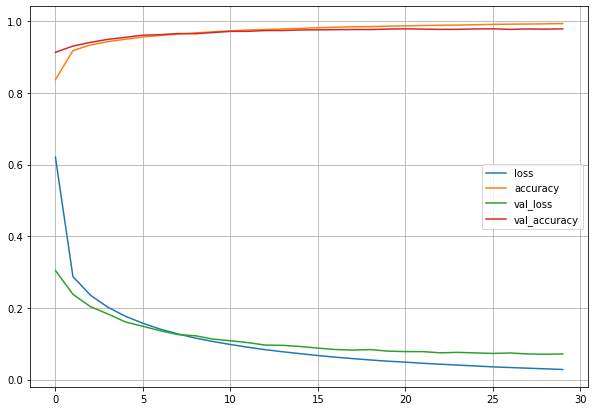

In [85]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [86]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9789


[0.06795037537813187, 0.9789000153541565]

In [87]:
10000/32

312.5

In [88]:
X_new=X_test[:3]

y_prob=model_clf.predict(X_new)
y_prob

array([[3.46470802e-06, 3.07546522e-08, 8.65493348e-05, 2.88384734e-04,
        3.71358966e-09, 3.91448722e-08, 4.64944272e-13, 9.99576151e-01,
        2.82630799e-06, 4.25405233e-05],
       [1.11367136e-07, 3.84954228e-06, 9.99948144e-01, 2.94635356e-05,
        2.53710052e-12, 2.87862008e-07, 2.70465034e-06, 3.27031457e-12,
        1.54317022e-05, 3.41455922e-14],
       [2.28453027e-05, 9.97644007e-01, 1.85634402e-04, 2.68753283e-05,
        4.29470238e-04, 1.23812817e-04, 6.19429338e-05, 9.73292161e-04,
        5.18606685e-04, 1.34203292e-05]], dtype=float32)

In [90]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [91]:
y_prob.shape

(3, 10)

In [92]:
y_pred=np.argmax(y_prob, axis = -1)

In [93]:
y_pred

array([7, 2, 1], dtype=int64)

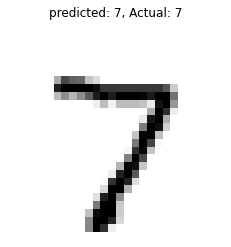

------------------------------------------------------------


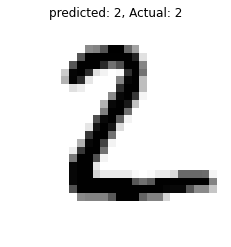

------------------------------------------------------------


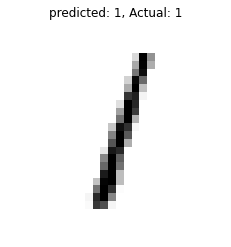

------------------------------------------------------------


In [95]:
for img_array, pred, actual in zip(X_new, y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [96]:
a = (1,2,3)

b = (5,6,7)

for i, j in zip(a,b):
  print(i+j)


6
8
10


In [97]:
zip(a,b)

In [98]:
list(zip(a,b))

[(1, 5), (2, 6), (3, 7)]

In [99]:
model_clf.save("model_clf.h5")